POR QUE O DINHEIRO ACABA ANTES DO FIM DO MÊS?

Muita gente ganha relativamente bem, mas vive endividada. O problema não é só quanto se ganha, mas como se gasta.

Este projeto nasceu da curiosidade de entender para onde o dinheiro realmente vai e quais padrões explicam o descontrole financeiro

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 Etata: Verificar dados

- Verificar se data e valor estão em forma de date/float
- Padronizar categorias -> criar categorias mês - dia da semana

In [5]:
dados = pd.read_csv('./data/gastos_pessoais.csv')

dados.info()

<class 'pandas.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             921 non-null    str    
 1   categoria        921 non-null    str    
 2   descricao        921 non-null    str    
 3   valor            921 non-null    float64
 4   forma_pagamento  921 non-null    str    
dtypes: float64(1), str(4)
memory usage: 36.1 KB


In [6]:
# Covertendo data em datetime
dados['data'] = pd.to_datetime(dados['data'])

dados.info()

<class 'pandas.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             921 non-null    datetime64[us]
 1   categoria        921 non-null    str           
 2   descricao        921 non-null    str           
 3   valor            921 non-null    float64       
 4   forma_pagamento  921 non-null    str           
dtypes: datetime64[us](1), float64(1), str(3)
memory usage: 36.1 KB


In [7]:
# Criando categoria mês e dia da semana

dados['mes'] = dados['data'].dt.month_name(locale='pt_BR')
dados['semana'] = dados['data'].dt.day_name(locale='pt_BR')

display(dados)

,data,categoria,descricao,valor,forma_pagamento,mes,semana
0,2024-01-01,Transporte,Gasto com Transporte,22.57,Crédito,Janeiro,Segunda-feira
1,2024-01-01,Educação,Gasto com Educação,215.63,Pix,Janeiro,Segunda-feira
2,2024-01-01,Educação,Gasto com Educação,329.64,Crédito,Janeiro,Segunda-feira
3,2024-01-01,Alimentação,Gasto com Alimentação,73.84,Débito,Janeiro,Segunda-feira
4,2024-01-01,Transporte,Gasto com Transporte,51.45,Dinheiro,Janeiro,Segunda-feira
...,...,...,...,...,...,...,...
916,2024-06-29,Transporte,Gasto com Transporte,43.77,Dinheiro,Junho,Sábado
917,2024-06-29,Transporte,Gasto com Transporte,28.60,Pix,Junho,Sábado
918,2024-06-29,Alimentação,Gasto com Alimentação,24.06,Dinheiro,Junho,Sábado
919,2024-06-30,Educação,Gasto com Educação,71.94,Dinheiro,Junho,Domingo


2️ Etapa: Análise exploratória (EDA)

- Total gasto por categoria
- Média de gasto diário
- Dias com mais gastos
- Gastos recorrentes vs esporádicos

In [8]:
# Total de Gastos Geral:
total_geral = dados['valor'].sum()

print(f'O valor geral é {total_geral:,.3f}')

O valor geral é 138,318.050


In [9]:
# Total de Gasto por Categoria

# agrupar por categoria e somando os valores
categoria_resumo = dados.groupby('categoria')['valor'].agg(['sum', 'count', 'mean']).reset_index()

# Renomeando as colunas para melhor compreensão
categoria_resumo.columns = ['Categoria', 'Total Gasto', 'Qtd Transações', 'Ticket Médio']

# Ordenar em quem consume o maior valor
categoria_resumo = categoria_resumo.sort_values(by='Total Gasto', ascending=False)
display(categoria_resumo)

,Categoria,Total Gasto,Qtd Transações,Ticket Médio
2,Educação,43208.77,187,231.062941
3,Lazer,34219.36,175,195.539200
5,Saúde,27972.31,167,167.498862
4,Moradia,18679.41,21,889.495714
0,Alimentação,7137.78,172,41.498721
6,Transporte,5828.44,171,34.084444
1,Assinaturas,1271.98,28,45.427857


In [10]:
# Pegar as informações da tabela

maior_categoria = categoria_resumo.iloc[0]['Categoria']
sub_categoria = categoria_resumo.iloc[1]['Categoria']
terceiro_categoria = categoria_resumo.iloc[2]['Categoria']

maior_valor = categoria_resumo.iloc[0]['Total Gasto']
sub_valor = categoria_resumo.iloc[1]['Total Gasto']
terceiro_valor = categoria_resumo.iloc[2]['Total Gasto']

maior_trans = categoria_resumo.iloc[0]['Qtd Transações']
sub_trans = categoria_resumo.iloc[1]['Qtd Transações']

print(f'As categorias com maiores gastos são {maior_categoria}, {sub_categoria} e {terceiro_categoria} '
      f'respectivamente com valores de R$ {maior_valor:,.2f}, R$ {sub_valor:,.2f} e R$ {terceiro_valor:,.2f}')

print('---------------------------------------------------------------------------------------------------')

print(f'A maior qnt de transação foi na categoria {maior_categoria} com {maior_trans} e segundo maior {terceiro_categoria} com {sub_trans}')

As categorias com maiores gastos são Educação, Lazer e Saúde respectivamente com valores de R$ 43,208.77, R$ 34,219.36 e R$ 27,972.31
---------------------------------------------------------------------------------------------------
A maior qnt de transação foi na categoria Educação com 187 e segundo maior Saúde com 175


In [11]:
# Distribuir percentual (%) de gastos

categoria_resumo['% do Orçamento'] = (categoria_resumo['Total Gasto'] / total_geral) * 100

categoria_resumo = categoria_resumo.sort_values(by='% do Orçamento', ascending=False)

display(categoria_resumo)

,Categoria,Total Gasto,Qtd Transações,Ticket Médio,% do Orçamento
2,Educação,43208.77,187,231.062941,31.238707
3,Lazer,34219.36,175,195.539200,24.739620
5,Saúde,27972.31,167,167.498862,20.223181
4,Moradia,18679.41,21,889.495714,13.504680
0,Alimentação,7137.78,172,41.498721,5.160411
6,Transporte,5828.44,171,34.084444,4.213796
1,Assinaturas,1271.98,28,45.427857,0.919605


In [12]:
# Pegando as informações da tabela acima

maior_orcamento = categoria_resumo.iloc[0]['% do Orçamento']
sub_orcamento = categoria_resumo.iloc[1]['% do Orçamento']
terc_orcamento = categoria_resumo.iloc[2]['% do Orçamento']

percentual_geral = maior_orcamento + sub_orcamento + terc_orcamento

print(f'As três principais categorias representam {percentual_geral:.2f}% do orçamento')

As três principais categorias representam 76.20% do orçamento


In [13]:
# media de gastos diario

valor_diario = dados.groupby('data')['valor'].sum()

valor_diario = valor_diario.mean()

print(f'A média de gastos diario é: R${valor_diario:.2f}')

A média de gastos diario é: R$764.19


In [14]:
# dias mais gasto

dia_mais_gasto = dados.groupby('semana')['valor'].sum().sort_values(ascending=False)

display(dia_mais_gasto)


semana
Quarta-feira     22467.43
Quinta-feira     22318.84
Domingo          20968.22
Terça-feira      19545.85
Sábado           18119.90
Sexta-feira      17729.04
Segunda-feira    17168.77
Name: valor, dtype: float64

In [15]:
# pegando informaçao da tabela acima

maior_dia = dia_mais_gasto.index[0]
sub_maior_dia = dia_mais_gasto.index[1]
menor_dia = dia_mais_gasto.index[6]

maior_valor_dia = dia_mais_gasto.iloc[0]
sub_valor_dia = dia_mais_gasto.iloc[1]
menor_valor_dia = dia_mais_gasto.iloc[6]

total_dias = maior_valor_dia + sub_valor_dia
percentual_dias = (total_dias / total_geral) * 100

print(
    f'Os dias {maior_dia} e {sub_maior_dia} foram os dias com mais gastos, '
    f'com valores de R$ {maior_valor_dia:,.2f} e R$ {sub_valor_dia:,.2f}, '
    f'totalizando R$ {total_dias:,.2f}, o que representa {percentual_dias:.2f}% do salário.'
)

Os dias Quarta-feira e Quinta-feira foram os dias com mais gastos, com valores de R$ 22,467.43 e R$ 22,318.84, totalizando R$ 44,786.27, o que representa 32.38% do salário.


In [16]:
# Gastos Recorrentes vs. Esporádicos
# Reconrrentes são aquelas compras que aparecem quase todo mês - aluguel, internet enquanto Esporádicos são compras unicas, emergência 

recorrencia = dados.groupby('descricao')['valor'].count().reset_index()

recorrencia.columns = ['Item', 'Frequencia']

# Se apareceu mais de 30 vezes, vamos considerar recorrente
recorrencia['Tipo'] = recorrencia['Frequencia'].apply(lambda x: 'Recorrente' if x > 30 else 'Esporádico')

display(recorrencia.sort_values(by='Frequencia', ascending=False).head(5))

,Item,Frequencia,Tipo
2,Gasto com Educação,187,Recorrente
3,Gasto com Lazer,175,Recorrente
0,Gasto com Alimentação,172,Recorrente
6,Gasto com Transporte,171,Recorrente
5,Gasto com Saúde,167,Recorrente


3 Etapa: Insights

- Educação, Lazer e Saúde representam 76.20% do orçamento
- Pequenos gastos abaixo de R$100 representam 14.35% do total
- Os finais de semana (Sábado e Domingo) concentram 28.26% dos gastos

In [17]:
# 100 reais para pequenos gastos

limite_gasto = 100
pequenos_gastos = dados[dados['valor'] < limite_gasto]

total_pequeno = pequenos_gastos['valor'].sum()

percentual_pequeno = (total_pequeno / total_geral) * 100
qnt_pequena = pequenos_gastos.shape[0] # usar o shape pra pegar o menor número

print(f"--- INSIGHT 1: O EFEITO FORMIGA ---")
print(f"Gastos de até R${limite_gasto} representam {percentual_pequeno:.2f}% do total.")
print(f"Isso aconteceu em {qnt_pequena} transações diferentes.")

--- INSIGHT 1: O EFEITO FORMIGA ---
Gastos de até R$100 representam 14.35% do total.
Isso aconteceu em 460 transações diferentes.


In [18]:
# gastos nos finais de semana 

gastos_fds = dia_mais_gasto[['Sábado', 'Domingo']].sum()

percentual_fds = (gastos_fds / total_geral) * 100

print(f"--- INSIGHT 3: O PESO DO LAZER ---")
print(f"Sábado e Domingo concentram R$ {gastos_fds:,.2f}.")
print(f"Isso equivale a {percentual_fds:.2f}% do gasto de toda a semana.")

--- INSIGHT 3: O PESO DO LAZER ---
Sábado e Domingo concentram R$ 39,088.12.
Isso equivale a 28.26% do gasto de toda a semana.


IMPLEMETANDO GRAFICOS

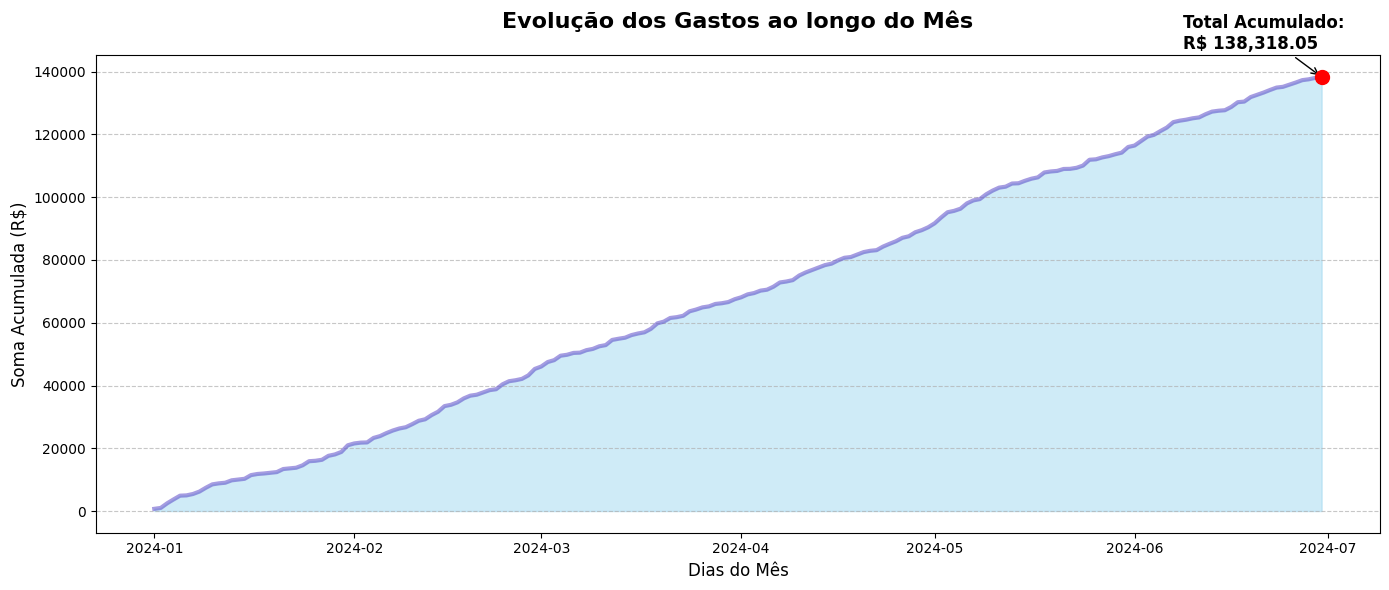

In [19]:
# evolução dos gastos ao longo do tempo

# 1. Preparar os dados (Garantir que a data está em ordem)
evolucao = dados.groupby("data")["valor"].sum().cumsum()

# 2. Criar o gráfico
plt.figure(figsize=(14, 6))

# Plotar a linha e preencher a área abaixo dela
plt.fill_between(evolucao.index, evolucao, color="skyblue", alpha=0.4)
plt.plot(evolucao.index, evolucao, color="Slateblue", alpha=0.6, linewidth=3)

# 3. Marcar o ponto final (O Valor Total)
valor_final = evolucao.iloc[-1]
plt.scatter(evolucao.index[-1], valor_final, color="red", s=100, zorder=5)
plt.annotate(f'Total Acumulado:\nR$ {valor_final:,.2f}', 
             xy=(evolucao.index[-1], valor_final),
             xytext=(-100, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=12, fontweight='bold')

# 4. Estilização
plt.title('Evolução dos Gastos ao longo do Mês', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Soma Acumulada (R$)', fontsize=12)
plt.xlabel('Dias do Mês', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('./imagens/evolucaodosgastos.png')


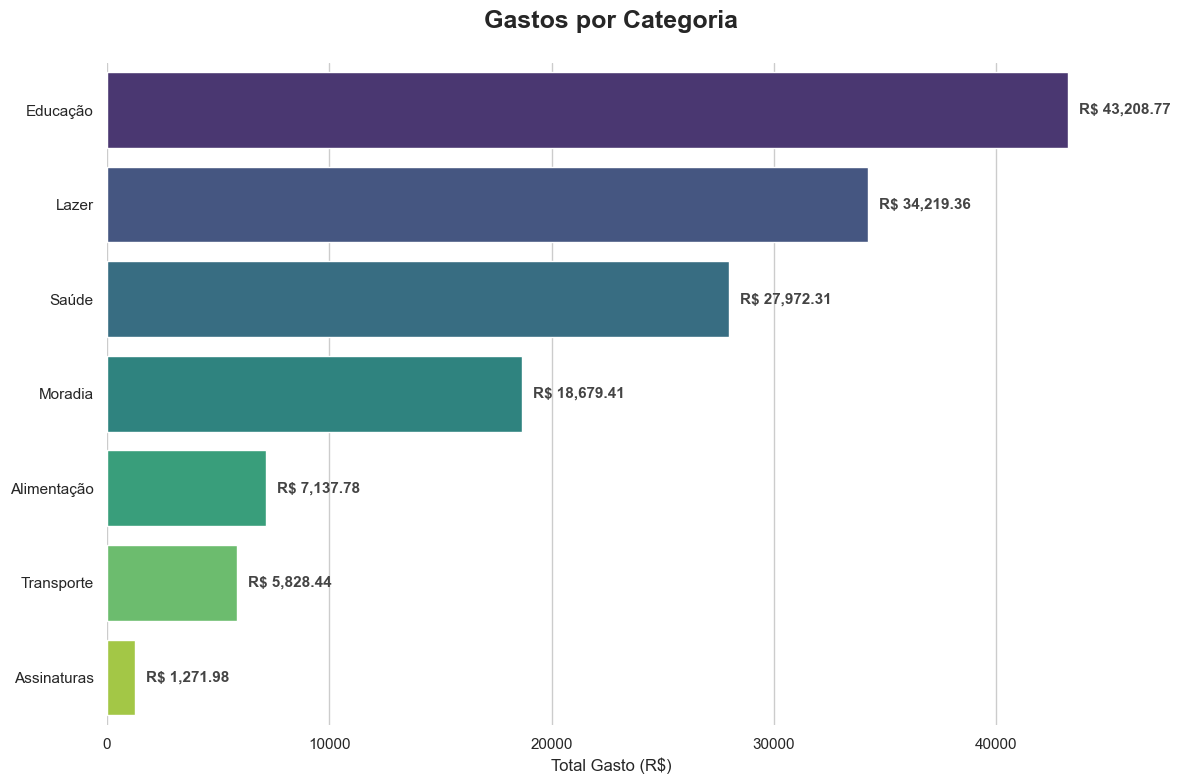

In [20]:
# 2. Configurar o estilo e tamanho
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# 3. Criar o gráfico de barras horizontais
# Usamos a paleta 'viridis' ou 'flare' para um degradê elegante
ax = sns.barplot(
    data=categoria_resumo,
    x="Total Gasto",
    y="Categoria",
    hue="Categoria",
    palette="viridis",
    legend=False
)

# 4. Adicionar os valores nas pontas das barras (O toque de mestre)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'R$ {width:,.2f}', 
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center', 
                xytext=(8, 0), 
                textcoords='offset points',
                fontsize=11, fontweight='bold', color='#444')

# 5. Títulos e Ajustes Finais
plt.title('Gastos por Categoria', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Total Gasto (R$)', fontsize=12)
plt.ylabel('') # Remove o rótulo lateral para ficar mais limpo

# Remove as bordas desnecessárias
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.savefig('./imagens/gastos_por_categoria.png')

1) Quais categorias pesam mais no orçamento?

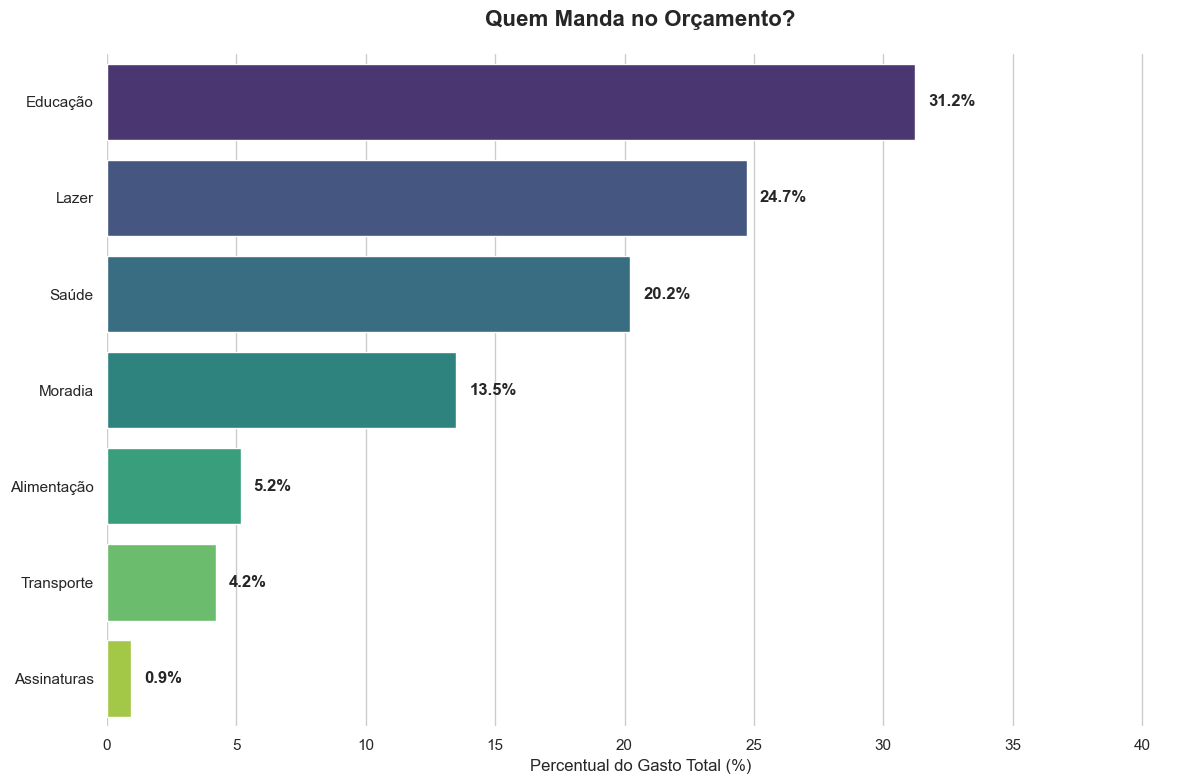

In [21]:
# 1. Configurar o estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# 2. Criar o gráfico de barras
# Ordenamos para que a maior barra fique no topo
df_plot = categoria_resumo.sort_values('% do Orçamento', ascending=False)

ax = sns.barplot(
    x='% do Orçamento', 
    y='Categoria', 
    data=df_plot, 
    hue='Categoria', 
    legend=False, 
    palette="viridis"
)
# 3. Adicionar os rótulos de porcentagem ao lado das barras
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(
        width + 0.5, 
        p.get_y() + p.get_height()/2, 
        f'{width:.1f}%', 
        ha='left', 
        va='center', 
        fontsize=12, 
        fontweight='bold'
    )

# 4. Títulos e Ajustes Finais
plt.title('Quem Manda no Orçamento?', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Percentual do Gasto Total (%)', fontsize=12)
plt.ylabel('', fontsize=12) # Remove o rótulo lateral para ficar mais limpo
plt.xlim(0, df_plot['% do Orçamento'].max() + 10) # Espaço para o texto

sns.despine(left=True, bottom=True) # Remove as bordas da caixa
plt.tight_layout()
plt.savefig('./imagens/onde_mora_orcamento.png')

2) EXISTEM PADRÕES NO DIA DA SEMANA?

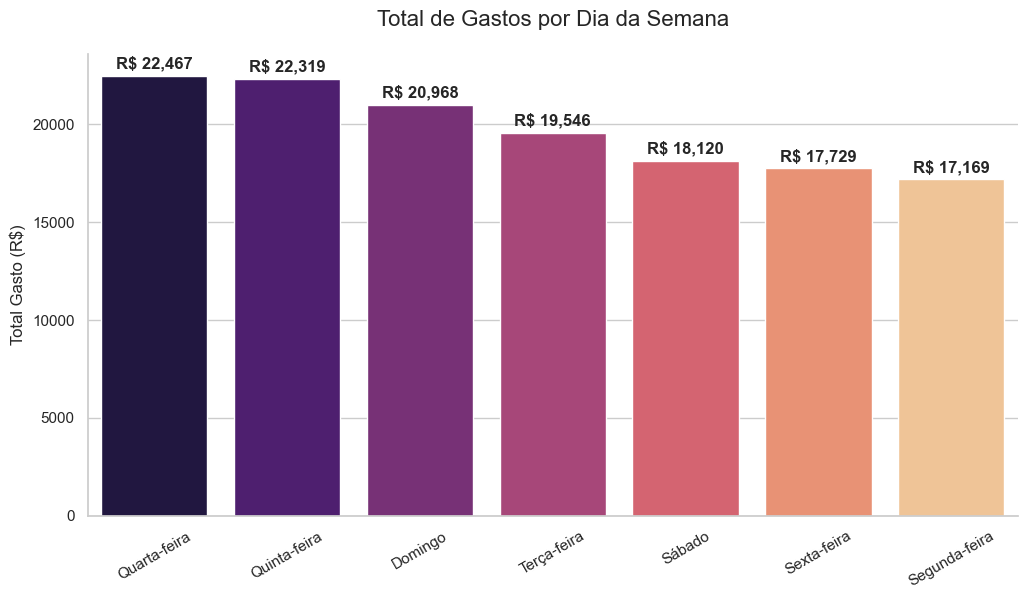

In [22]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=dia_mais_gasto.index,
    y=dia_mais_gasto.values,
    hue=dia_mais_gasto.index,
    palette="magma",
    legend=False
)

for p in ax.patches:
    ax.annotate(
        f'R$ {p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 9),
        textcoords='offset points',
        fontweight='bold'
    )

plt.title('Total de Gastos por Dia da Semana', fontsize=16, pad=20)
plt.ylabel('Total Gasto (R$)')
plt.xlabel('')
plt.xticks(rotation=30)
sns.despine()

plt.savefig('./imagens/total_gastos_semana.png')
plt.show()


Gastos pequenos frequentes fazem mais estrago que gastos grandes?

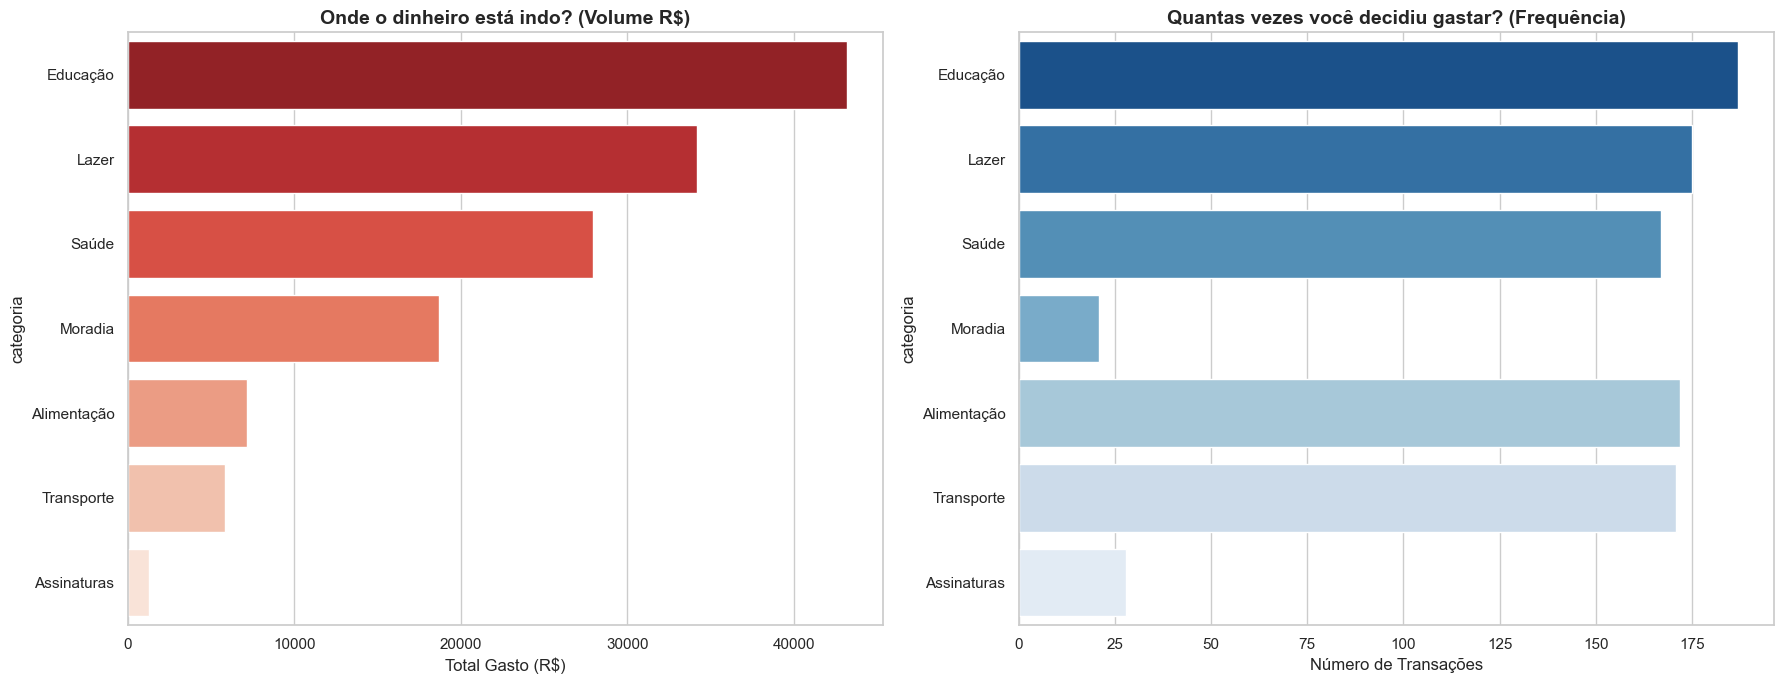

In [23]:
# 1. Preparando os dados
resumo = dados.groupby('categoria')['valor'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)
resumo.columns = ['Frequência (Vezes)', 'Total (R$)']

# 2. Criando a figura com dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Volume Financeiro (O que "parece" ser o problema)
sns.barplot(x=resumo['Total (R$)'], y=resumo.index, ax=ax1, hue=resumo.index, legend=False, palette='Reds_r')
ax1.set_title('Onde o dinheiro está indo? (Volume R$)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Gasto (R$)')

# Gráfico 2: Frequência de Transações (Onde o hábito está escondido)
sns.barplot(x=resumo['Frequência (Vezes)'], y=resumo.index, ax=ax2, hue=resumo.index, legend=False, palette='Blues_r')
ax2.set_title('Quantas vezes você decidiu gastar? (Frequência)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Número de Transações')

plt.tight_layout()
plt.savefig('./imagens/estragos_gastos_pequenos.png')

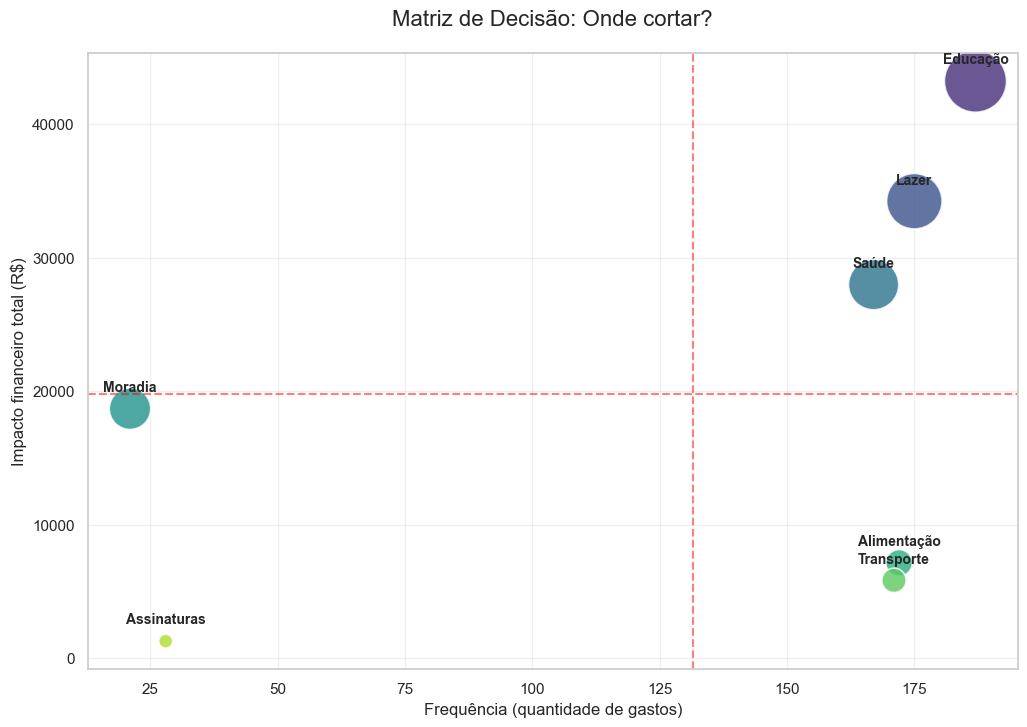

In [24]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=categoria_resumo,
    x='Qtd Transações',
    y='Total Gasto',
    size='Total Gasto',
    hue='Categoria',
    sizes=(100, 2000),
    palette='viridis',
    legend=False,
    alpha=0.8
)

for _, row in categoria_resumo.iterrows():
    plt.text(
        row['Qtd Transações'],
        row['Total Gasto'] + (categoria_resumo['Total Gasto'].max() * 0.03),
        row['Categoria'],
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Matriz de Decisão: Onde cortar?', fontsize=16, pad=20)
plt.xlabel('Frequência (quantidade de gastos)')
plt.ylabel('Impacto financeiro total (R$)')

plt.axhline(categoria_resumo['Total Gasto'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axvline(categoria_resumo['Qtd Transações'].mean(), color='red', linestyle='--', alpha=0.5)

plt.grid(True, alpha=0.3)
plt.savefig('./imagens/onde_cortar_orcamento.png')
plt.show()


CRIANDO RELATÓRIO

In [27]:
from reportlab.platypus.tables import TableStyle
from reportlab.platypus import (SimpleDocTemplate, Paragraph, Spacer, Image, Table)
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from datetime import datetime

styles = getSampleStyleSheet()
styles.add(ParagraphStyle(
    name="Justificado",
    alignment=4,
    spaceAfter=10
))
# =========================
# CRIANDO PDF
# =========================
arquivo = "relatorio_gastos.pdf"
doc = SimpleDocTemplate(
    arquivo,
    pagesize=A4,
    rightMargin=40,
    leftMargin=40,
    topMargin=40,
    bottomMargin=40
)

story = []

story.append(Paragraph(
    "Relatório de Análise de Gastos Pessoais",
    styles["Title"]
))
story.append(Spacer(1, 30))

# =========================
# CONTEXTO DA ANÁLISE
# =========================
story.append(Paragraph("1. Introdução", styles["Heading2"]))
story.append(Spacer(1, 8))

story.append(Paragraph(
    "A dificuldade em poupar dinheiro é uma realidade comum, mesmo entre pessoas com renda estável. "
    "Muitas vezes, o problema não está no quanto se ganha, mas na falta de clareza sobre como o dinheiro é gasto ao longo do tempo.",
    styles["Justificado"]
))

story.append(Spacer(1, 1))

story.append(Paragraph(
    "Este projeto analisa seis meses de gastos pessoais utilizando <b>Python</b> e <b>Pandas</b> "
    "para identificar padrões de consumo, categorias mais impactantes no orçamento e possíveis oportunidades de economia.",
    styles["Justificado"]
))

story.append(Spacer(1, 1))

story.append(Paragraph(
    "A proposta é transformar dados financeiros em informações práticas para apoiar decisões mais conscientes.",
    styles["Justificado"]
))

story.append(Spacer(1, 1))

story.append(Paragraph(
    "Este projeto nasce justamente dessa pergunta prática do dia a dia: <b>Para onde o dinheiro vai antes do fim do mês?</b>",
    styles["Justificado"]
))

story.append(Spacer(1, 12))

# =========================
# 2. VISÃO GERAL
# =========================
story.append(Paragraph("2. Visão Geral do Orçamento", styles["Heading2"]))
story.append(Spacer(1, 8))

story.append(Paragraph(f"Entre janeiro e junho de 2024, o total acumulado de gastos atingiu: <b>R$ {total_geral:,.3f}</b>.", styles["Justificado"]))
story.append(Spacer(1, 1))

story.append(Paragraph("A análise do gasto acumulado ao longo dos meses revelou um crescimento constante, sem picos isolados extremos. " \
"Isso indica que o impacto financeiro vem da soma de gastos recorrentes, e não de eventos pontuais, como mostra o gráfico a seguir:", styles["Justificado"]))

story.append(Spacer(1,8))

story.append(Image("./imagens/evolucaodosgastos.png", width=500, height=300))

story.append(Spacer(1, 20))

# =========================
# 3. ANÁLISE EXPLORATÓRIA
# =========================
story.append(Paragraph("3. Análise Exploratória dos Dados", styles["Heading2"]))
story.append(Spacer(1, 8))

# 3.1 Gastos Totais por Categoria
story.append(Paragraph('3.1 Gastos por Categoria', styles['Heading3']))
story.append(Spacer(1, 8))

story.append(Paragraph(f"""
As categorias com maior impacto financeiro foram <b>{maior_categoria}</b> e <b>{sub_categoria}</b>, com gastos de
<b>R$ {maior_valor:,.2f}</b> e <b>R$ {sub_valor:,.2f}</b>, evidenciando forte concentração de despesas.
""", styles["Justificado"]))

story.append(Spacer(1,8))

story.append(Image('./imagens/onde_mora_orcamento.png', width=500, height=300))
story.append(Spacer(1,8))

story.append(Paragraph(f"""
Diante do gráfico, podemos observar que o orçamento não está concentrado apenas em desespesas básicas. Grande parte dos recursos está direcionado a <b>'{maior_categoria}'</b>, <b>'{sub_categoria}'</b> e <b>{terceiro_categoria}</b> representam <b>{percentual_geral:.2f}%</b> do orçamento."""))

story.append(Spacer(1, 20))

story.append(Paragraph('3.2 Consumo por Dia da Semana', styles['Heading3']))
story.append(Spacer(1, 8))

story.append(Paragraph("A distribuição dos gastos ao longo da semana apresentou esses seguintes dados:", styles["Justificado"]))
story.append(Spacer(1,8))

story.append(Image('./imagens/total_gastos_semana.png', width=500, height=350))
story.append(Spacer(1,8))

story.append(Paragraph(f"""
O gráfico evidencia um ciclo de elevação no meio da semana. Enquanto <b>{menor_dia}</b> apresenta o menor volume financeiro
<b>(R$ {menor_valor_dia:,.2f})</b>, observa-se uma curva ascendente que atinge seu pico em <b>{maior_dia}</b> e
<b>{sub_maior_dia}</b>, com valores de <b>R$ {maior_valor_dia:,.2f}</b> e <b>R$ {sub_valor_dia:,.2f}</b>, respectivamente.

Somados, esses dois dias representam <b>R$ {total_dias:,.2f}</b> do total semanal, correspondendo, aproximadamento <b>{percentual_dias:,.2f}</b>.
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph("""
Esse padrão indica que o meio da semana concentra a maior pressão financeira, possivelmente associada ao vencimento
de contas fixas e a hábitos recorrentes de consumo.
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph(f"Já os finais de semana: <b>Sábado</b> e <b>Domingo</b>, representam o valor de <b>R$ {gastos_fds:,.2f}</b> somados, respectivamente <b>{percentual_fds:,.2f}%</b> do orçamento."))

story.append(Spacer(1,20))

story.append(Paragraph('3.3 Pequenos Gastos vs. Grandes Gastos', styles['Heading3']))
story.append(Spacer(1, 8))

story.append(Paragraph("""
Esta seção analisa a natureza das despesas, contrastando o impacto financeiro total de cada categoria com a recorrência das transações. 
O objetivo é identificar os gastos entre <b>pequenos (abaixo de R$50)</b> e <b>grandes (acima de R$50)</b>.
"""))
story.append(Spacer(1,8))

story.append(Image('./imagens/estragos_gastos_pequenos.png', width=500, height=200))
story.append(Spacer(1,8))

story.append(Paragraph("""
A comparação entre o Volume Financeiro (R$) e a Frequência de Transações revela a diferença entre gastos planejados (grandes) e gastos por impulso ou hábito (pequenos).""", styles["Justificado"]))

story.append(Spacer(1,1))         

story.append(Paragraph("""
As categorias de Alimentação e Transporte são exemplos claros de
<i>pequenos gastos recorrentes</i> que impactam o orçamento pela repetição:
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph("""
<b>• Frequência elevada:</b> Ambas apresentam número muito alto de transações,
comparável ao de Educação (cerca de 170 a 175 ocorrências em seis meses).
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph("""
<b>• Baixo volume individual:</b> Apesar da alta frequência, o valor total acumulado
permanece relativamente baixo no ranking geral de gastos.
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph(f"""
Ou seja, Isso confirma que são gastos individuais pequenos <b>(abaixo de R$ {limite_gasto})</b>, mas que exigem atenção por serem decisões de consumo constantes que podem drenar o orçamento sem perceber.E é nesta repetição do pequeno gasto que o controle se perde, pois o cérebro subestima o impacto financeiro.
""", styles["Justificado"]))

story.append(Spacer(1,8))

story.append(Paragraph('3.4 Onde o Orçamento é Comprometido', styles['Heading3']))
story.append(Spacer(1, 8))

story.append(Paragraph("""
Para identificar onde estão os maiores gargalos, utilizamos uma Matriz de Decisão que cruza a frequência de uso (o hábito) com o impacto financeiro total (o custo).
"""))
story.append(Spacer(1, 8))

story.append(Image('./imagens/onde_cortar_orcamento.png', width=500, height=350))
story.append(Spacer(1, 8))

story.append(Paragraph(f"""
As categorias localizadas no canto superior direito são as que mais pressionam o orçamento: <b>{maior_categoria}</b>, <b>{sub_categoria}</b>, <b>{terceiro_categoria}</b>: apresentando os maiores volumes financeiros, <b>{percentual_geral:.2f}% do orçamento</b>. 
Ambas possuem alta frequência (entre 165 e 185 transações), o que indica que fazem parte do estilo de vida e do desenvolvimento pessoal.""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph(f"""Porém, no quadrante inferior direito, encontramos o perigo dos gastos invisíveis: Alimentação e Transporte. Estas categorias são as verdadeiras vilãs da liquidez mensal. 
Embora o impacto financeiro total de cada uma seja menor do que o de <b>{maior_categoria}</b>, 
a frequência de transações é alarmante, aproximando-se de 175 vezes em 6 meses.""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph("""
Isso confirma que, o dinheiro não acaba devido aos grandes investimentos, mas sim através da exaustão por repetição de pequenas escolhas diárias. 
Para manter os investimentos em Educação e os momentos essenciais de Lazer, a estratégia de corte deve focar em diminuir o número de vezes que se utiliza transporte por aplicativo ou pedidos de delivery.
"""))
story.append(Spacer(1, 20))

story.append(Paragraph('4. Conclusão', styles['Heading3']))
story.append(Spacer(1, 8))

story.append(Paragraph("""
A análise demonstra que o descontrole financeiro não é apenas uma questão de "gastar muito", mas está fortemente ligado à falta de visibilidade sobre os gastos cotidianos. Ao organizar e analisar os dados, padrões antes invisíveis, como o impacto cumulativo dos pequenos gastos em alimentação e transporte, tornam-se evidentes e acionáveis.
""", styles["Justificado"]))

story.append(Spacer(1,1))

story.append(Paragraph("""
A utilização de ferramentas como Python e Pandas permitiu transformar registros brutos em inteligência financeira, orientando decisões mais conscientes. O projeto prova que pequenas mudanças de hábito (como reduzir a frequência de transações supérfluas), quando baseadas em dados, geram impactos significativos na preservação da renda ao longo do tempo.
""", styles["Justificado"]))

story.append(Spacer(1, 1))

story.append(Paragraph("""
Em última análise, este projeto reforça que a análise de dados é um instrumento prático de liberdade pessoal. Ela permite que os recursos sejam direcionados para o que realmente importa, como Educação e Lazer, garantindo que o dinheiro trabalhe para os objetivos de vida, e não desapareça antes do fim do mês.
""", styles["Justificado"]))

story.append(Spacer(1, 40))
nome = 'Aninha'
story.append(Paragraph(
    f"""
    <b>Data de emissão:</b> {datetime.now().strftime("%d/%m/%Y")}<br/>
    <b>Responsável pela análise:</b> {nome}
    """,
    styles["Normal"]
))

In [28]:
from reportlab.lib.units import cm

# =========================
# RODAPÉ
# =========================#

def rodape(canvas, doc):
    canvas.saveState()

    texto_esquerda = "Relatório de Análise de Gastos"
    texto_direita = f"Página {doc.page}"

    canvas.setFont("Helvetica", 9)

    # Linha separadora
    canvas.setStrokeColor(colors.grey)
    canvas.line(2*cm, 2*cm, 19*cm, 2*cm)

    # Texto
    canvas.drawString(2*cm, 1.5*cm, texto_esquerda)
    canvas.drawRightString(19*cm, 1.5*cm, texto_direita)

    canvas.restoreState()

# =========================
# GERAR RELATÓRIO
# =========================
doc.build(
    story,
    onFirstPage=rodape,
    onLaterPages=rodape
)